In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


### Introduction

In the following document we will review various experimental and theoretical studies performed in the field of sensory systems neuroscience that focus on how populations of neurons encode signals about the environment. At present it is unclear what are the basic principles of how neuronal populations encode sensory information. For example, it is not known what sort of coding schemes neuronal populations might use. It is also not known whether the encoding framework, which, historically, stems largely from the field of Information Theory, is even the most fruitful way of trying to understand how neurons mediate the relationship between an organism's environment and the organism's behavior.

In light of these difficulties, a large body of work has focused on determining the theoretical limits on information processing capacity in variously organized networks. This work has often, though likely not often enough, been constrained by certain results from the empirical literature in sensory systems neuroscience. As much of this literature in the 1990's through the present day (2015) have focused on how neuronal variability, and specifically covariability, might impact coding accuracy, this topic will also be our focus here. 

In this document we will review the basic theoretical findings from a number of articles published in the field. To aid our understanding of these findings we will work through simulations of the described work to reproduce the main findings in the relevant articles. Frequently, however, we will digress a bit to dig deeper into some of the background to this theoretical work which is often not able to be covered in sufficient detail in the primary articles themselves.

### Some Basic Terms

**Population Coding** 

Refers to the idea that, from a behavioral standpoint, the most directly relevant "operational unit" of the brain is a group, or population, of neurons. That is, a single neocortical cell's firing only very rarely leads to any behaviorally relevant difference or outcome, and most of the time, many neurons acting in concert are required to generate behavior. Population coding, specifically, refers to the idea that certain patterns of activity in a population are more meaningful towards generating behavior than others. Deciphering these patterns is equivalent to deciphering the population code.


**Discrimination** 

Is a type of behavior that relies heavily of perceptual information and that is frequently studied in the field of sensory systems neuroscience. *Discrimination tasks* are one of the mainstays of perceptual and sensory systems neuroscience, as one can record directly from individual or populations of neurons directly involved in generating the perceptions and subsequently the behaviors involved in successful performance of such tasks. In a discrimination task, the subject must typically decide, or discriminate, between possible alternative interpretations of sensory stimulus, for example, discriminating a leftward or rightward motion of an object or a change in orientation of another object.

In addition to enabling the study of the activity of neurons directly involved in perception and behavior, much theoretical work has been carried out through the years pertaining to discrimination and the theoretical limits a system can or cannot achieve under different circumstances regarding its ability to discriminate between stimuli.


**Noise Correlations or Correlated Variability**

Refers to correlations between pairs of neurons in the fluctuations they exhibit around their mean responses to repeated presentations of a stimulus.

As noise correlations will be a central focus in much of the work we discuss here, I will demonstrate what they are and how they are computed with a simple simulation. In the following, we use a bivariate normal distribution to generate two vectors of random numbers which will correspond to spike counts across trials of two neurons. The *spike count* is the currency of neuronal variability in the coding literature and is calculated simply by counting the number of action potentials the neuron fires in a particular time interval following stimulus onset. We generate two spike trains below:

In [6]:
mu = [10, 12]
sig = [[2, 1],[1, 3]]
nTrials = 100
# the result here is two vectors of length nTrials where each element is an integer 
neu = rint(random.multivariate_normal(mu, sig, nTrials)) 

In [8]:
def getZed(sc):
    sc = array(sc)
    mu = mean(sc)
    sig = std(sc)
    zedScore = (sc - mu) / sig
    return zedScore

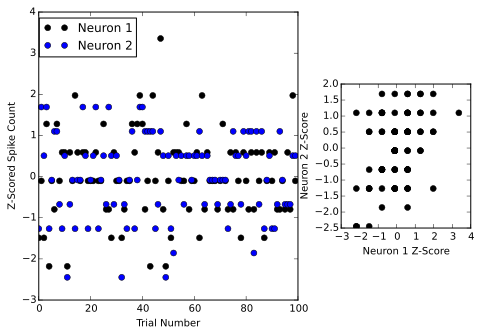

In [9]:
z1 = getZed(neu[:,0])
z2 = getZed(neu[:,1])

axes([0,0,.6,1])
plot(z1, 'ok', label='Neuron 1')
plot(z2, 'ob', label='Neuron 2')
xlabel('Trial Number')
ylabel('Z-Scored Spike Count')
legend(bbox_to_anchor=(.4, 1))


axes([.7,.25,.3,.5])
plot(z1, z2, 'ok')
xlabel('Neuron 1 Z-Score')
ylabel('Neuron 2 Z-Score')

Above we plot the z-scored spike counts of our neuronal pair in two different forms. On the left is a plot showing the Z-Score across time, or trials, while on the right we plot the z-scores relative to each other. This latter plot makes it easier to visualize whether the cells are correlated or not. Here we see that as cell 1 increases its spike coint, cell 2 has a tendency to do similarly, meaning they are correlated. 

To quantify this relationship we take the Pearson's correlation coefficient of the z-scored spike counts.

$$
\rho = \frac{Cov(X,Y)}{\sigma_x\sigma_y}
$$

Here, $X = Z_1$ and $Y = Z_2$, and as we are working with z-scores, $E[Z] = 0$ and $\sigma_Z = 1$, giving:

\begin{align}
\rho &= \frac{Cov(Z_1,Z_2)}{\sigma_{Z_1}\sigma_{Z_2}} \\
&= \frac{E[Z_1Z_2] - E[Z_1]E[Z_2]}{\sigma_{Z_1}\sigma_{Z_2}} \\
&= E[Z_1Z_2] \\
\end{align}

In [10]:
Ezz = mean(z1*z2) # z1 * z2 gives is the elementwise product of z1 and z2 rather than a dot-product of two vectors
rho = corrcoef(z1,z2)
rho


array([[ 1.        ,  0.36381042],
       [ 0.36381042,  1.        ]])

In [12]:
Ezz

0.36381042045895479

Thus, our pair of neurons are quite strongly noise correlated (as we would expect given how we simulated the spike trains).

With these preliminaries out of the way, let's focus on our first paper.

 ### Correlated neuronal discharge rate and its implications for psychophysical performance. 
 *Zohary et al. (1994) Nature*

In this article, the authors measure levels of correlated variability between pairs of neurons while subjects perform a discrimination task and then assess theoretically how these correlations impact population coding in a simple neuronal model where responses are pooled. 

Prior work demonstrated that neuronal sensitivity in discrimination tasks is often near, and sometimes exceeds, behavioral sensitivity (see Britten et al. (1992) The analysis of visual motion. JNeuro), raising the question: why is behavioral performance not greater than that of individual neurons? This issue is particularly striking given that it is thought that populations, rather than single neurons, guide behavior. Thus, if we have a population of highly sensitive neurons and behavior is generated through their joint activity, pooling (averaging, eg) the responses of all of these cells together should provide an even more accurate representation and higher sensitivity. However, we don't see a level of behavioral performance that matches this expected degree of neuronal sensitivity.

This study offers a potential answer to the conundrum: we don't see such high levels of performance because neurons are noise correlated, and such correlations diminish the benefit of pooling responses across groups of neurons.

To study the impact that correlations have on pooling responses together, the authors studied how the SNR (signal-to-noise) ratio is affected by correlation. If we have a population of $M$ neurons whose firing rates are identically distributed and given by $X_i$, the SNR of the summed signals $\mu$, in this case, is given by:

\begin{align}
SNR &= \frac{\mu}{\sigma_\Sigma} \\
&= \frac{\langle\sum_{i=1}^{M}X_i\rangle} {\sigma_\Sigma} \\
&= \frac{M \langle X_i\rangle}{\sqrt{M\sigma^2 + M(M-1)r\sigma^2}}
\end{align}

where $\sigma_\Sigma$ is the standard deviation of the summed signal $\mu$, $\sigma^2$ is the variance of each unit, and $r$ is the correlation coefficient between each pair of pooled neurons.

Below, we plot the SNR as a function of population size for different values of correlation coefficient $r$, reproducing Fig3A from Zohary et al. (1994).

In [24]:
def signal_to_noise(M, mu, sigma, r):
    """
    Compute the signal to noise ratio for uniformly pooled spike counts from neurons 
    with identical mean (mu), standard deviation (sigma), and pair-wise correlation 
    coefficient (r)
    """
    SNR = (M * mu) / sqrt(M * sigma**2 + M * (M-1) * r * sigma**2)
    return SNR

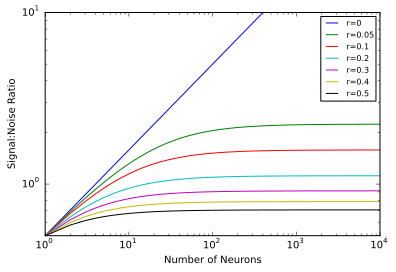

In [27]:
M = arange(1, 10001)
mu = .1
sigma = .2
rho = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

fig = Figure()
for r in rho:
    SNR = signal_to_noise(M, mu, sigma, r)
    labStr = "r={0}".format(r)
    plot(M, SNR, label=labStr)
    
legend(prop={'size':8})
xscale('log')
yscale('log')
ylim([0, 10])    
xlabel('Number of Neurons')
ylabel('Signal:Noise Ratio')
plt.show()

Thus, we can see with a theoretical analysis of a neuronal pooling model that, with any degree of correlation greater than zero, we get a saturation in the signal to noise level of the pooled responses. This means that in the presence of correlations there is no benefit to listening to a larger group of neurons after a certain, and quite low considering how many neurons are in a small volume of cortex, point.

The finding reviewed above is certainly not the only important result from this paper, but this result serves as a good introduction to what has become the central issue in the field: how do correlations between pairs of neurons impact coding? Is the signal always limited by such correlations?

To continute our discussion of this issue, we will turn our attention to a paper by Sompolinksy et al. which begins exactly where the above conversation leaves off, with a simple pooling model.

### Population coding in neuronal systems with correlated noise
*Sompolinsky et al (2001)*

The primary focus of this paper is to undertake an analysis of a population of neurons encoding a particular stimulus parameter, for example, angle or orientation of the stimulus. The first model discussed in the paper focuses on linear discrimination in a population of uniformly correlated neurons, while the second focuses on estimation of an angular variable from a population of neurons that exhibit a particular pattern of correlations, called limited-range correlations, which differs from the uniform case examined thus far. I will elaborate on this pattern of correlations as our discussion reaches the topic (which actually will not be until our discussion of Ecker et al 2011). For now, let us focus on linear discrimination in a population of uniformly correlated neurons. We will first briefly introduce the model and the goal of the task, and in our discussion of the topic, we will provide a more thorough treatment of the topic of discrimination as well.

In our model we assume there are two stimuli and our population of $N$ neurons have mean firing rates $f_i^+$ for one stimulus and $f_i^-$ for the other.

The probability of the joint response $\mathbf{r}$ follows a Gaussian distribution given either stimulus. Using the + stimulus for example:

$$
p(\mathbf{r}|+) = Z^{-1}\exp{\left(-\frac{1}{2}\sum_{i,j}(r_i-f_i^+)C^{-1}(r_j-f_j^+)\right)}
$$

This model represents an *additive noise model* as the firing rate of neuron $r_i$ can be written as:

$$
r_i = f_i + \eta_i,
$$

where $f_i$ represents either the + or - stimulus mean for neuron $i$, and $\eta_i$ is the $i^\text{th}$ element of $\mathbf{\eta}$ which is normally distributed with $\mu=0$ and covariance matrix $C$.

For our discrimination task, we put ourselves in the place of a downstream neuron whose job is to listen to our sensory neurons and determine whether the stimulus is a + or a - type. Discriminating between these stimuli amounts to essentially a categorization or classification task, where we must determine which category or class the stimulus belongs to, with our classes being + or - in this case. Discrimination is different from estimating the value of a parameter of the stimulus presented, for example the orientation of the stimulus, as no precise estimation of specific parameter values is needed for correct discrimination to occur. In both cases, however, our currency is firing rates. We have knowledge of how many action potentials each cell fires in response to the stimulus shown and we must combine those firing rates in some manner to come to our conclusion (reflecting a prominent hypothesis in the field that the brain does something similarly).

We are further constrained to performing linear discrimination, so this means that we are restricted in the ways we can combine our set of firing rates, denoted by the bold $\mathbf{r}$ and referred to above as the joint response. Specifically we can multiply each rate by a number or add another number to it, but that is all. Ultimately we want to combine them in a way that makes their class membership clear.



We are working with the following readout rule as specified in the paper:

$$
L_w(\mathbf{r}) = \sum_iw_ir_i = \mathbf{w}^T\mathbf{r}
$$

Now, we saw above that the joint response $\mathbf{r}$ follows a Gaussian distribution given a particular stimulus value. As there are two stimuli, the full distribution of firing rates is a mixture of Gaussian distributions (one for each stimulus value). With a population of more than 2 neurons, this mixture becomes rather difficult to visualize. However, linear functions of Gaussian distributed variables produce Gaussian distributed outcomes, and since our readout rule is a linear function of Gaussian distributed variables, the result is Gaussian as well. More specifically, it represents a mixture of Gaussians (one for each stimulus), but this mixture distribution is easy to visualize because it is one-dimensional rather than N-dimensional (as is the case for our original joint response distribution). In linear algebra, left-multiplying a matrix by a lower-dimensional (also called, lower-rank) matrix is called projection. In this case we are projecting our firing rate vector onto our weight vector, and we get a scalar, and therefore one-dimensional, result.

We will now demonstrate that this readout rule does produce a mixture of Gaussians. We will assume all weights are equal for simplicity's sake. We additionally assume all neurons "prefer" the + stimulus (that is, they all have higher rates for the + than the - stimulus) and that they are independent. 

First we generate the mean rates for each neuron for each stimulus, corresponding to $f^+$ and $f^-$. We plot the histogram of these mean rate vectors below.

(array([  3.,   7.,   8.,   8.,  11.,   7.,   2.,   3.,   0.,   1.]),
 array([  7.08152896,  10.78282636,  14.48412375,  18.18542115,
         21.88671855,  25.58801595,  29.28931335,  32.99061075,
         36.69190815,  40.39320555,  44.09450295]),
 <a list of 10 Patch objects>)

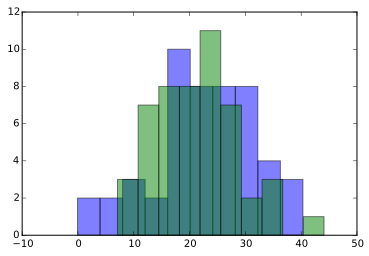

In [57]:
N = 50 # number of neurons
fPlus = random.normal(21, 10, N) # vector of mean rates for + stimulus
fMinus = random.normal(20, 10, N) # vector of mean rates for - stimulus
cov = 2 * eye(N) # covariance matrix, all neurons are independent and with same variance (isotropic)
rPlus = random.multivariate_normal(fPlus, cov, 1000) # use specified mean and cov to generate observations
rPlus = rPlus.T
rMinus = random.multivariate_normal(fMinus, cov, 1000)
rMinus = rMinus.T
hist(fPlus, alpha=0.5)
hist(fMinus, alpha=0.5)

In the above, we generated 1000 observations for each stimulus. To get our readout distributions we use uniform weights, such that $w_i=\frac{1}{N}$, and plug $\mathbf{w}$ into our above equation, but instead of $\mathbf{r}$ we use $\mathbf{R}$, which is a 50x1000 matrix calculated above and called rPlus or rMinus, where each observation is a column:

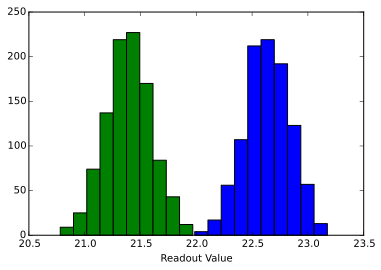

In [58]:
w = ones(N)/N
Lp = dot(w, rPlus)
Lm = dot(w, rMinus)
hist(Lp)
hist(Lm)
xlabel('Readout Value')

In [59]:
dot(w, fPlus)

22.637447837890306

In [60]:
dot(w, fMinus)

21.396236628702788

The above distributions are clearly separable visually and are Gaussian distributed, and as stated in the paper, the means of the two mixture components (distributions for + and - stimulus) are equal to $\mathbf{w}^T\mathbf{f}$, where $\mathbf{f}$ can be the vector of means for the + stimulus or the - stimulus. We can begin to see how one could construct a classification rule for our stimulus type based on our input $\mathbf{r}$. As a first approximation, if $L_w(\mathbf{r})$ is closer to $L_w(\mathbf{f^+})$ than $L_w(\mathbf{f^-})$, we conclude the presence of a + stimulus. Closeness is determined by the magnitude of the difference between our result, $L_w(\mathbf{r})$, and the corresponding mean. This is one way in which we can construct what's called a *threshold* for discrimination. In this case rather than calculating two differences and comparing them, we can just ask whether the result $L_w(\mathbf{r})$ is greater than the halfway point between the means of our two distributions. Thus our threshold is determined by 

$$
\frac{L_w(\mathbf{f^+}) + L_w(\mathbf{f^-})}{2}
$$

To formalize this a bit further, we have just reported the *Maximum Likelihood boundary* for classification. Given that our data are generated by one or another Gaussian distribution, we assign our data point $L_w(\mathbf{r})$ to the class for which the *likelihood* of generating the data is higher. To maximize likelihood with Gaussian distributions, we choose class with smaller exponent term. That is we assign $L_w(\mathbf{r})$ to $f^+$ if

\begin{align}
(L_w(\mathbf{r})-L_w(\mathbf{f^+}))^T\Sigma^{-1}(L_w(\mathbf{r})-L_w(\mathbf{f^+})) < (L_w(\mathbf{r})-L_w(\mathbf{f^-}))^T\Sigma^{-1}(L_w(\mathbf{r})-L_w(\mathbf{f^-}))
\end{align}

Referring back to our above discussion of distances between our two class means, the above inequality makes just this comparison, but uses a metric known as the *Mahalanobis distance.* We now derive the ML classification boundary; for notational clarity we omit the $L_w(*)$ prefix:

\begin{align}
\mathbf{r}^T\Sigma^{-1}\mathbf{r} - \mathbf{f^+}^T\Sigma^{-1}\mathbf{r} - \mathbf{r}^T\Sigma^{-1}\mathbf{f^+} - \mathbf{f^+}^T\Sigma^{-1}\mathbf{f^+} &< \mathbf{r}^T\Sigma^{-1}\mathbf{r} - \mathbf{f^-}^T\Sigma^{-1}\mathbf{r} - \mathbf{r}^T\Sigma^{-1}\mathbf{f^-} + \mathbf{f^-}^T\Sigma^{-1}\mathbf{f^-} \\
\mathbf{f^-}^T\Sigma^{-1}\mathbf{r} - \mathbf{f^+}^T\Sigma^{-1}\mathbf{r} + \mathbf{r}^T\Sigma^{-1}\mathbf{f^-}  - \mathbf{r}^T\Sigma^{-1}\mathbf{f^+} &<  \mathbf{f^+}^T\Sigma^{-1}\mathbf{f^+} + \mathbf{f^-}^T\Sigma^{-1}\mathbf{f^-} \\
(\mathbf{f^-} - \mathbf{f^+})^T\Sigma^{-1}\mathbf{r} + \mathbf{r}^T\Sigma^{-1}(\mathbf{f^-} - \mathbf{f^+}) &< (\mathbf{f^-} + \mathbf{f^+})^T\Sigma^{-1}(\mathbf{f^-} - \mathbf{f^+}) \\
\end{align}

Now making the substitution $\mathbf{d}^T = (\mathbf{f^-} - \mathbf{f^+})^T\Sigma^{-1}$

\begin{align}
2\mathbf{d}^T\mathbf{r} &< \mathbf{d}^T(\mathbf{f^-} + \mathbf{f^+}) \\
0 &> \mathbf{d}^T\mathbf{r} - \mathbf{d}^T\frac{1}{2}(\mathbf{f^-} + \mathbf{f^+}) \\
0 &> \mathbf{d}^T(\mathbf{r} - \frac{1}{2}(\mathbf{f^-} + \mathbf{f^+}))
\end{align}

The final expression above on the right hand side is our *discriminant function*, from which we can see that, given that $\mathbf{d} < 0$, the above inequality reduces to $\mathbf{r} > \frac{1}{2}(\mathbf{f^-} + \mathbf{f^+})$. Returning to our full notation, we see that if:

$$
L_w(\mathbf{r}) > \frac{(L_w(\mathbf{f^+}) + L_w(\mathbf{f^-}))}{2}
$$

we should choose $f^+$, thus matching up with our inuition that threshold should be placed exactly in the middle of the two means.

In [61]:
thresh = (dot(w,fMinus) + dot(w,fPlus)) / 2
thresh

22.016842233296547

As an exercise to test our intuition further, we now introduce uniform correlations amongst the neurons in our population and plot a readout histogram equivalent to that shown above.

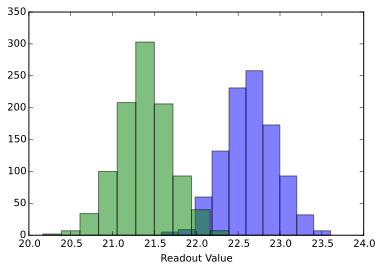

In [62]:
N = 50 # number of neurons
rho = .05
cov = rho * ones((N, N)) + eye(N) * (2-rho)
rPlus = random.multivariate_normal(fPlus, cov, 1000)
rPlus = rPlus.T
rMinus = random.multivariate_normal(fMinus, cov, 1000)
rMinus = rMinus.T
w = ones(N)/N
Lp = dot(w, rPlus)
Lm = dot(w, rMinus)
hist(Lp, alpha=0.5)
hist(Lm, alpha=0.5)
xlabel('Readout Value')

The first thing to notice is that it now appears as though the two component distributions are closer to each other than they were before, and we might therefore wonder whether increasing the correlations further leads to less separation between the two components. As we might intuit from our discussion so far, such a result does occur. 

There are a number of methods that could be used to quantify this separation and demonstrate this effect. We have encountered one thus far, which is the signal to noise ratio. Another is called d-prime, $d'$, and is equivalent to the SNR for two isotropic Gaussians. The signal to noise ratio is used in Zohary et al. (1994) as well as in the present paper, and it can be defined either as the ratio of mean and standard deviation $\frac{\mu}{\sigma}$ or as that quantity squared (as in the case of the present paper). To see the relation between $d'$ and the SNR, note

$$
d' = \frac{\mu_1 - \mu_2}{\sqrt{\frac{1}{2}(\sigma_1^2 + \sigma_2^2)}},
$$

which simplifies to the following when $\sigma_1 = \sigma_2$,

$$
d' = \frac{\mu_1 - \mu_2}{\sigma_1}.
$$

We can see the relation to SNR now, where $\mu = \mu_1 - \mu_2$

\begin{align}
SNR = \frac{\mu^2}{\sigma^2} = (d')^2 &= \frac{{(L_w(f^+) - L_w(f^-))}^2}{E[(L_w(r) - L_w(f^+))^2]} \\
&= \frac{(\mathbf{w^Tf^+} - \mathbf{w^Tf^-})^2}{\mathbf{w^TCw}} = \frac{(\mathbf{w^T(f^+ - f^-)})^2}{\mathbf{w^TCw}}
\end{align}

We have previously shown that with increasing correlations, the SNR decreases. The same result holds in this case defining the new SNR as the square of the previous (from Zohary et al. 1994), and we find that in the limit of large populations and with $g = f^+ - f^-$:

\begin{align}
SNR = \frac{1}{a}\frac{(\sum{g_iw_i})^2}{(1-c)\sum{w_i}^2 + c(\sum{w_i})^2}
\end{align}

**Uniform Pooling** produces the result we saw in Zohary et al. (1994). Here we take $w_i = w$:

\begin{align}
SNR &= \frac{1}{a}\frac{N^4\bar{g}^2}{(1-c)N^3 + cN^4} \\
&= \frac{N}{(1-c) + cN}S_0
\end{align}

where $S_0 = \frac{\bar{g}^2}{a}$. The SNR approaches $\frac{\bar{g}^2}{ac}$ as N approaches infinity, and with  $a=\sigma^2_\Sigma$ and $c = r$ we recover the result from Zohary et al. (1994).

**Optimal Weighting** however, does better than a simple uniform pooling rule by choosing $\mathbf{w}$ such that it maximizes the SNR. 

\begin{align}
\frac{d(SNR)}{d\mathbf{w}} &= \frac{d}{d\mathbf{w}}\left(\frac{(\mathbf{w}^T\mathbf{g})^2}{\mathbf{w}^T\mathbf{C}\mathbf{w}}\right) \\
&= \frac{2(\mathbf{w}^T\mathbf{g})\mathbf{g}^T(\mathbf{w}^T\mathbf{C}\mathbf{w}) - 2\mathbf{w}^T\mathbf{C}(\mathbf{w}^T\mathbf{g})^2} {(\mathbf{w}^T\mathbf{C}\mathbf{w})^2} = 0 \\
\end{align}

At this stage we recognize that $\mathbf{w}^T\mathbf{g} = \kappa$ is a constant, as is $\mathbf{w}^T\mathbf{C}\mathbf{w} = \lambda$. This gives:

\begin{align}
0 &= \kappa\lambda\mathbf{g}^T - \kappa^2\mathbf{w}^T\mathbf{C} \\
\kappa\mathbf{C}\mathbf{w} &= \lambda\mathbf{g} \\
\mathbf{w} &\propto \mathbf{C}^{-1}\mathbf{g}
\end{align}

This result is commonly known as *Fisher's Linear Discriminant*, although strictly speaking it is a direction in our N-dimensional firing rate space on which to project the data down to one dimension rather than being a function which provides a threshold for discriminating between the classes. It provides the *optimal* dimension onto which to project the data in the sense that it strikes a balance between maximizing the distance between the class means while minimizing the variances of the projected distributions.

We now derive the SNR with these new weights and examine it's asymptotic behavior in the limit of large populations to see whether with optimal weights, the SNR still saturates.

\begin{align}
SNR = \frac{(\mathbf{w}^T\mathbf{g})^2}{\mathbf{w}^T\mathbf{C}\mathbf{w}} &= \frac{(\mathbf{g}^T\mathbf{C}^{-1}\mathbf{g})^2}{\mathbf{g}^T\mathbf{C}^{-1}\mathbf{C}\mathbf{C}^{-1}\mathbf{g}} = \mathbf{g}^T\mathbf{C}^{-1}\mathbf{g} \\
\end{align}

We now make use of the *Sherman-Morrison* inversion formula to find $\mathbf{C}^{-1}$. This formula states that if $\mathbf{C}$ is decomposable into $(\mathbf{A} + \mathbf{uv}^T)$ then

$$ 
\mathbf{C}^{-1} = (\mathbf{A} + \mathbf{uv}^T)^{-1} = \mathbf{A}^{-1} - \frac{\mathbf{A}^{-1}\mathbf{u}\mathbf{v}^T\mathbf{A}^{-1}}{1 + \mathbf{v}^T\mathbf{A}^{-1}\mathbf{u}}
$$

$$
\therefore\,SNR = \mathbf{g}^T\mathbf{A}^{-1}\mathbf{g} - \mathbf{g}^T\left(\frac{\mathbf{A}^{-1}\mathbf{u}\mathbf{v}^T\mathbf{A}^{-1}}{1 + \mathbf{v}^T\mathbf{A}^{-1}\mathbf{u}}\right)\mathbf{g} \\
$$

Now with $\mathbf{A} = (1-c)a\mathbf{I}$ and $\mathbf{u} = \mathbf{v} = \sqrt{ac}\mathbf{1}$

\begin{align}
SNR &= \frac{\sum_{i}g_i^2}{(1-c)a} - \left(\frac{1}{(1-c)^2a^2}\frac{ac}{1+\frac{Nac}{(1-c)a}}\right)\left(\sum_{i}g_i\right)^2 \\
&= \frac{N\overline{g^2}}{(1-c)a} - \frac{c}{(1-c)^2a}\frac{N^2\bar{g}^2}{\frac{1-c+Nc}{(1-c)}} \\
&= \frac{N\overline{g^2}}{a}\left(\frac{1}{(1-c)} - \frac{cN(1-\kappa)}{(1-c)(1-c+Nc)}\right) \\
&= {NS_0}\left(\frac{1-c(1-N\kappa)}{(1-c)(1-c+Nc)}\right)
\end{align}

where $\kappa = \frac{\overline{g^2} - \bar{g}^2}{\overline{g^2}}$ and $S_0=\frac{\overline{g^2}}{a}$.

Below we will visualize this result to see how the SNR behaves with increasingly large neuronal populations as well as increasing correlations. We will see that in all cases, the SNR increases with increasing population size, though the increase occurs at different rates for different values of $c$.

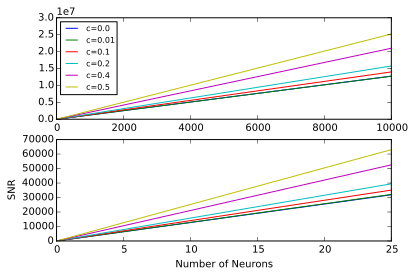

In [66]:
N = arange(10000)
C = array([0, 0.01, 0.1, 0.2, 0.4, 0.5])
a = 0.1
g2Bar = mean((fPlus - fMinus)**2)
gBar2 = mean((fPlus - fMinus))**2
k = (g2Bar - gBar2) / g2Bar
Snot = g2Bar/a
f, ax = plt.subplots(2)
for c in C:
    S = zeros(N.shape)
    S = N*Snot*(1-c*(1-N*k)) / ((1-c)*(1-c+N*c))
    labStr = "c={}".format(c)
    ax[0].plot(N, S, label=labStr)
    ax[1].plot(N[0:26],S[0:26], label=labStr)
ax[0].legend(prop={'size':8}, loc='upper left')
xlabel('Number of Neurons')
ylabel('SNR')


Compare these results with our first figure plotting the SNR in our discussion of Zohary et al above. Doing so we see that our choice of weights in the readout process makes a big difference in the information we get out of our model population of neurons. With uniform weights our SNR saturates, but by choosing optimal weights (according to Fisher's Linear Discriminant, eg) we see that the SNR grows linearly with population size. This increase occurs regardless of how strongly correlated our neurons are. In fact, when performing optimal readout, the SNR increases faster (steeper slope) for larger values of correlation coefficient $r$. Hence, in sharp contrast to the case of uniform weights where increasing correlation coefficient led to earlier satuation in SNR, higher correlation coefficient is more helpful when using optimal weights.

**Significance for Neural Coding**

Our take-away from these two studies, thus far at least, is that uniformly correlated populations of neurons can still contain a lot of information, but it depends on how we read out the activity. Thus, it is an important question how downstream neurons read out activity in upstream populations. What sorts of constraints exist regarding possible readout rules?

Another reason why we might be interested in correlations is that the level at which information saturates, if it does, might reveal something about the size of the basic representational unit in the cortex. For a discussion along these lines please see Shadlen and Newsome (1998) in *J Neuroscience*. The analysis so far suggests, however, that this approach will not be revealing of such principles, at least not under the circumstances handled in the literature thus far. 

Of course a major limitation of the analyses up to this point is that only one type of correlation structure, uniform correlations on an additive noise model, has been considered. 